In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import os
from sklearn import datasets
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.externals.six import StringIO

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

#visualization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')

from IPython.display import Image
from sklearn.tree import export_graphviz

# Import packages
import pandas as pd
import numpy as np
from scipy import stats
import math
from sklearn import datasets

#Seaborn makes creating attractive graphs simpler
import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)},font_scale=1,style='whitegrid')

#Matplotlib allows for completely custom graphing
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc, confusion_matrix, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Ridge, Lasso

from scipy import interp
from itertools import cycle
import numpy as np
from numpy.linalg import norm

from sklearn import datasets
from sklearn import svm

from sklearn.utils import resample
#from imblearn.over_sampling import SMOTE
from collections import Counter
import itertools

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [26]:
rdata = pd.read_csv("/Users/SofiaS/Documents/GitHub/InsightTeam2020/Jeffrey/Motor_Vehicle_Crashes_Reduced.csv")
print(rdata.dtypes)
print(rdata.shape)

NUMTIME                          float64
BOROUGH                           object
LATITUDE                         float64
LONGITUDE                        float64
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
dtype: object
(1048575, 14)


In [22]:
def cyclist_to_bin(x):
    if x == 0:
        return 0
    else:
        return 1
def motorist_to_bin(x):
    if x == 0:
        return 0
    else:
        return 1
def pedestrian_to_bin(x):
    if x == 0:
        return 0
    else:
        return 1
def rush_to_bin(x):
    if 7.5<x<9 or 16.5<x<19:
        return 1
    else:
        return 0
def persons_to_bin(x):
    if x == 0:
        return 0
    else:
        return 1
def persons_to_class(x):
    if x[2] == 1:
        return 1
    if x[3] == 1:
        return 2
    if x[4] == 1:
        return 3
    else:
        return 0
def multiple_personas(x):
    return x[2]+x[3]+x[4]

In [27]:
data["CYCLIST_AFFECTED"] = data["NUMBER OF CYCLIST INJURED"]+data["NUMBER OF CYCLIST KILLED"]
data["MOTORIST_AFFECTED"] = data["NUMBER OF MOTORIST INJURED"]+data["NUMBER OF MOTORIST KILLED"]
data["PEDESTRIAN_AFFECTED"] = data["NUMBER OF PEDESTRIANS INJURED"]+data["NUMBER OF PEDESTRIANS KILLED"]
data['PERSONS_AFFECTED'] = data['NUMBER OF PERSONS KILLED'] + data['NUMBER OF PERSONS INJURED']
data['PERSONS_TF']= data['PERSONS_AFFECTED'].apply(persons_to_bin)
data['MOTORIST_TF']= data["MOTORIST_AFFECTED"].apply(motorist_to_bin)
data['CYCLIST_TF']= data["CYCLIST_AFFECTED"].apply(cyclist_to_bin)
data['PEDESTRIAN_TF']= data["PEDESTRIAN_AFFECTED"].apply(pedestrian_to_bin)
data['RUSH_TF'] = data['NUMTIME'].apply(rush_to_bin)
data['PERSONS_AFFECTED'] = data['NUMBER OF PERSONS KILLED'] + data['NUMBER OF PERSONS INJURED']

In [28]:
value_counts = data["CONTRIBUTING FACTOR VEHICLE 1"].value_counts(ascending=True)
remove = value_counts[value_counts <= 20].index
data = data[~data['CONTRIBUTING FACTOR VEHICLE 1'].isin(remove)]

data['CONTRIBUTING FACTOR VEHICLE 1'] = data['CONTRIBUTING FACTOR VEHICLE 1'].replace(['Driver Inattention/Distraction','Following Too Closely','Failure to Yield Right-of-Way','Backing Unsafely','Passing Too Closely','Unsafe Lane Changing','Passing or Lane Usage Improper','Turning Improperly','Traffic Control Disregarded','Driver Inexperience','Reaction to Uninvolved Vehicle','Unsafe Speed','Fatigued/Drowsy','Alcohol Involvement','Lost Consciousness','Aggressive Driving/Road Rage','Fell Asleep','Illnes','Drugs (illegal)','Drugs (Illegal)','Texting','Outside Car Distraction','Passenger Distraction','Prescription Medication','Failure to Keep Right','Illness','Other Electronic Device','Cell Phone (hand-Held)','Cell Phone (hands-free)','Eating or Drinking','Pedestrian/Bicyclist/Other Pedestrian Error/Confusion','Physical Disability','Reaction to Other Uninvolved Vehicle','Using On Board Navigation Device','Tinted Windows','Vehicle Vandalism','Cell Phone (hand-held)'],'Human')
data['CONTRIBUTING FACTOR VEHICLE 1'] = data['CONTRIBUTING FACTOR VEHICLE 1'].replace(['Other Vehicular','Oversized Vehicle','Brakes Defective','Steering Failure','Tire Failure/Inadequate','Driverless/Runaway Vehicle','Accelerator Defective','Other Lighting Defects','Tow Hitch Defective','Headlights Defective','Windshield Inadequate'],'Vehicular')
data['CONTRIBUTING FACTOR VEHICLE 1'] = data['CONTRIBUTING FACTOR VEHICLE 1'].replace(['Pavement Slippery','View Obstructed/Limited','Glare','Obstruction/Debris','Pavement Defective','Animals Action','Lane Marking Improper/Inadequate','Traffic Control Device Improper/Non-Working','Shoulders Defective/Improper'],'Environmental')
data['CONTRIBUTING FACTOR VEHICLE 1'] = data['CONTRIBUTING FACTOR VEHICLE 1'].replace(['80'],'Unspecified')
print(print(data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()))

/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

Human            700952
Unspecified      271594
Vehicular         47800
Environmental     24862
Name: CONTRIBUTING FACTOR VEHICLE 1, dtype: int64
None


/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
factor_dummy = data['CONTRIBUTING FACTOR VEHICLE 1'].str.get_dummies()
data = pd.concat([data,factor_dummy],axis=1)
borough_dummy = data.BOROUGH.str.get_dummies()
data = pd.concat([data,borough_dummy],axis=1)

In [30]:
data.drop(data.columns[1:18],axis=1,inplace=True)
print(data.dtypes)

NUMTIME          float64
PERSONS_TF         int64
MOTORIST_TF        int64
CYCLIST_TF         int64
PEDESTRIAN_TF      int64
RUSH_TF            int64
Environmental      int64
Human              int64
Unspecified        int64
Vehicular          int64
BRONX              int64
BROOKLYN           int64
MANHATTAN          int64
QUEENS             int64
STATEN ISLAND      int64
dtype: object


In [31]:
data['EDGE_CASES'] = data.apply(multiple_personas,axis = 1)
data.EDGE_CASES.value_counts()

0.0    840499
1.0    206887
2.0      1155
3.0         7
Name: EDGE_CASES, dtype: int64

In [32]:
index = data[(data['EDGE_CASES'] != 1)].index
data.drop(index,inplace=True)
print(data.shape)
print(data.dtypes)

(206887, 16)
NUMTIME          float64
PERSONS_TF         int64
MOTORIST_TF        int64
CYCLIST_TF         int64
PEDESTRIAN_TF      int64
RUSH_TF            int64
Environmental      int64
Human              int64
Unspecified        int64
Vehicular          int64
BRONX              int64
BROOKLYN           int64
MANHATTAN          int64
QUEENS             int64
STATEN ISLAND      int64
EDGE_CASES       float64
dtype: object


In [33]:
data['PERSONS_CLASS'] = data.apply(persons_to_class,axis=1)
data.PERSONS_CLASS.value_counts()

1    136168
3     48972
2     21747
Name: PERSONS_CLASS, dtype: int64

In [42]:
model = MLPClassifier(hidden_layer_sizes = (300,300,300), 
                    activation='relu', 
                    solver = 'adam', 
                    verbose=True, 
                    random_state=0, 
                    max_iter=500)
pred = list(zip(data['NUMTIME'],data['MANHATTAN'],data['QUEENS'],data['BRONX'],data['STATEN ISLAND'],data['BROOKLYN'],data['Human'],data['Environmental'],data['Vehicular'],data['Unspecified']))
resp = data['PERSONS_CLASS']
resp.value_counts()

1    136168
3     48972
2     21747
Name: PERSONS_CLASS, dtype: int64

In [43]:
sm = SMOTE(random_state=42)
x_res,y_res = sm.fit_resample(pred,resp)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 136168, 2: 136168, 3: 136168})


In [44]:
X_train,X_test,y_train,y_test = train_test_split(x_res,y_res,test_size = .3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Iteration 1, loss = 1.04646474
Iteration 2, loss = 1.03400265
Iteration 3, loss = 1.03258796
Iteration 4, loss = 1.03211679
Iteration 5, loss = 1.03132032
Iteration 6, loss = 1.03082631
Iteration 7, loss = 1.03015072
Iteration 8, loss = 1.02954214
Iteration 9, loss = 1.02909134
Iteration 10, loss = 1.02881940
Iteration 11, loss = 1.02848527
Iteration 12, loss = 1.02821856
Iteration 13, loss = 1.02805856
Iteration 14, loss = 1.02764284
Iteration 15, loss = 1.02750262
Iteration 16, loss = 1.02734070
Iteration 17, loss = 1.02718589
Iteration 18, loss = 1.02701090
Iteration 19, loss = 1.02681745
Iteration 20, loss = 1.02668806
Iteration 21, loss = 1.02653829
Iteration 22, loss = 1.02638067
Iteration 23, loss = 1.02622965
Iteration 24, loss = 1.02601253
Iteration 25, loss = 1.02580527
Iteration 26, loss = 1.02575857
Iteration 27, loss = 1.02575213
Iteration 28, loss = 1.02553623
Iteration 29, loss = 1.02545974
Iteration 30, loss = 1.02533802
Iteration 31, loss = 1.02527088
Iteration 32, los

In [45]:
print('MLP Score: ',model.score(X_test,y_test))
print("Null accuracy on the test set: ",y_test.mean())

y_pred = model.predict(X_test)

#print("Sensitivity/Recall (TPR): ",metrics.recall_score(y_test,y_pred))
#print("Precision (PPV): ", metrics.precision_score(y_test,y_pred))
#print("F1:", metrics.f1_score(y_test,y_pred))

#print("Null accuracy on the test set: ",y_test.mean())
#print("Accuracy is:",metrics.accuracy_score(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

MLP Score:  0.4609308701612377
Null accuracy on the test set:  2.0002774332528235
              precision    recall  f1-score   support

           1       0.47      0.54      0.50     40800
           2       0.47      0.37      0.41     40918
           3       0.44      0.48      0.46     40834

    accuracy                           0.46    122552
   macro avg       0.46      0.46      0.46    122552
weighted avg       0.46      0.46      0.46    122552



[Text(30.5, 0.5, 'Actual Class'),
 Text(0.5, 30.5, 'Predicted Class'),
 Text(0.5, 1, 'Confusion Matrix')]

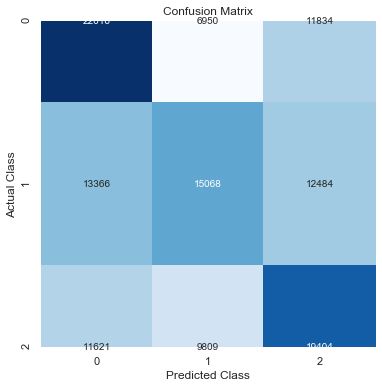

In [46]:
#X_train, X_test, y_train, y_test = train_test_split(x_res,y_res, test_size=0.3)
#model.fit(X_train,y_train)

test_cf = pd.DataFrame(confusion_matrix(y_test,model.predict(X_test)))

fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(test_cf,annot=True,fmt='d',cmap='Blues',cbar=False)
ax.set(xlabel='Predicted Class',ylabel='Actual Class',title='Confusion Matrix')

[Text(30.5, 0.5, 'Actual Class'),
 Text(0.5, 30.5, 'Predicted Class'),
 Text(0.5, 1, 'Normalized Confusion Matrix')]

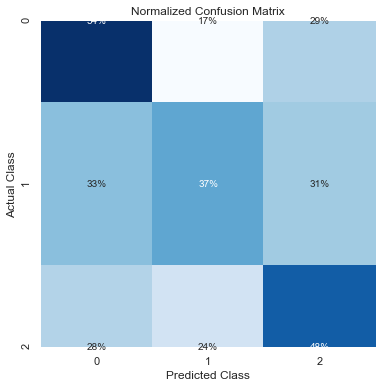

In [47]:
test_cf = confusion_matrix(y_test,model.predict(X_test))
test_cf = test_cf.astype('float') / test_cf.sum(axis=1)[:, np.newaxis]
test_cf = pd.DataFrame((test_cf))
                           
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(test_cf,annot=True,cmap='Blues',cbar=False,fmt='.0%')
ax.set(xlabel='Predicted Class',ylabel='Actual Class',title='Normalized Confusion Matrix')

In [51]:
model = MLPClassifier(hidden_layer_sizes = (300,300,300), 
                    activation='relu', 
                    solver = 'adam', 
                    verbose=True, 
                    random_state=0, 
                    max_iter=200)
pred2 = list(zip(data['MANHATTAN'],data['QUEENS'],data['BRONX'],data['STATEN ISLAND'],data['BROOKLYN'],data['Human'],data['Environmental'],data['Vehicular'],data['Unspecified']))
resp2 = data['RUSH_TF']
resp2.value_counts()

0    159616
1     47271
Name: RUSH_TF, dtype: int64

In [52]:
sm = SMOTE(random_state=42)
x_res2,y_res2 = sm.fit_resample(pred2,resp2)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 136168, 2: 136168, 3: 136168})


In [53]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(x_res2,y_res2,test_size = .3)
model.fit(X_train2,y_train2)
y_pred2 = model.predict(X_test2)
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

print("Null accuracy on the test set: ",y_test2.mean())

Iteration 1, loss = 0.69276124
Iteration 2, loss = 0.69237384
Iteration 3, loss = 0.69230385
Iteration 4, loss = 0.69223490
Iteration 5, loss = 0.69222531
Iteration 6, loss = 0.69219944
Iteration 7, loss = 0.69219143
Iteration 8, loss = 0.69215763
Iteration 9, loss = 0.69213585
Iteration 10, loss = 0.69214421
Iteration 11, loss = 0.69214484
Iteration 12, loss = 0.69211214
Iteration 13, loss = 0.69209646
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Accuracy: 0.5219901848177926
Null accuracy on the test set:  0.49978072465281403


In [54]:
print('MLP Scpore: ',model.score(X_test2,y_test2))
print("Null accuracy on the test set: ",y_test2.mean())

y_pred2 = model.predict(X_test2)

print("Sensitivity/Recall (TPR): ",metrics.recall_score(y_test2,y_pred2))
print("Precision (PPV): ", metrics.precision_score(y_test2,y_pred2))
print("F1:", metrics.f1_score(y_test2,y_pred2))

print("Null accuracy on the test set: ",y_test2.mean())
print("Accuracy is:",metrics.accuracy_score(y_test2,y_pred2))
print(metrics.classification_report(y_test2,y_pred2))

MLP Scpore:  0.5219901848177926
Null accuracy on the test set:  0.49978072465281403
Sensitivity/Recall (TPR):  0.5570992812970081
Precision (PPV):  0.5203434481412821
F1: 0.5380944212937271
Null accuracy on the test set:  0.49978072465281403
Accuracy is: 0.5219901848177926
              precision    recall  f1-score   support

           0       0.52      0.49      0.50     47906
           1       0.52      0.56      0.54     47864

    accuracy                           0.52     95770
   macro avg       0.52      0.52      0.52     95770
weighted avg       0.52      0.52      0.52     95770



[Text(30.5, 0.5, 'Actual Class'),
 Text(0.5, 30.5, 'Predicted Class'),
 Text(0.5, 1, 'Confusion Matrix')]

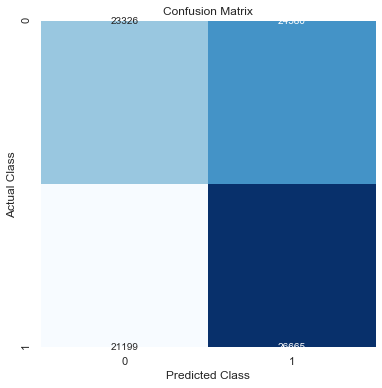

In [55]:
#X_train2, X_test2, y_train2, y_test2 = train_test_split(x_res2,y_res2, test_size=0.3)
#model.fit(X_train2,y_train2)

test_cf = pd.DataFrame(confusion_matrix(y_test2,model.predict(X_test2)))

fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(test_cf,annot=True,fmt='d',cmap='Blues',cbar=False)
ax.set(xlabel='Predicted Class',ylabel='Actual Class',title='Confusion Matrix')

[Text(30.5, 0.5, 'Actual Class'),
 Text(0.5, 30.5, 'Predicted Class'),
 Text(0.5, 1, 'Normalized Confusion Matrix')]

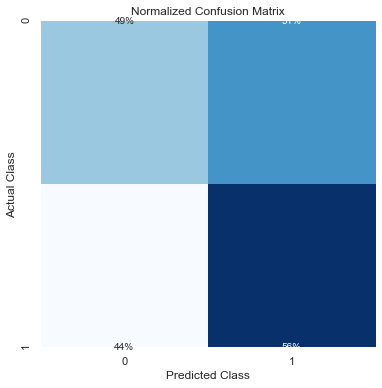

In [56]:
test_cf = confusion_matrix(y_test2,model.predict(X_test2))
test_cf = test_cf.astype('float') / test_cf.sum(axis=1)[:, np.newaxis]
test_cf = pd.DataFrame((test_cf))
                           
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(test_cf,annot=True,cmap='Blues',cbar=False,fmt='.0%')
ax.set(xlabel='Predicted Class',ylabel='Actual Class',title='Normalized Confusion Matrix')